In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np  # Import numpy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
# Select relevant columns from the train dataset
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Extract features and target from the train dataset
X_train = train_data[features].copy()  # Create a copy to avoid SettingWithCopyWarning
y_train = train_data[target]


In [3]:
# Calculate total number of bathrooms (full + half bathrooms)
X_train['TotalBath'] = X_train['FullBath'] + 0.5 * X_train['HalfBath']
X_train = X_train.drop(columns=['FullBath', 'HalfBath'])


In [4]:
# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a pipeline to include polynomial features
degree = 2  # Degree of polynomial features
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

In [5]:
# Train the model using cross-validation to evaluate its performance
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")

Cross-Validation R² Scores: [0.67221808 0.33726768 0.63833431 0.50858451 0.71767638]
Mean Cross-Validation R² Score: 0.5748161924248057


In [7]:
# Fit the model on the entire training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = pipeline.predict(X_val)

# Evaluate the model on the validation set
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Absolute Error: {mae}")
print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R² Score: {r2}")


Validation Mean Absolute Error: 33997.02252193107
Validation Mean Squared Error: 2468809697.3683805
Validation R² Score: 0.6781349800931418


In [9]:
# Preprocess the test dataset
X_test = test_data[features].copy()  # Create a copy to avoid SettingWithCopyWarning
X_test['TotalBath'] = X_test['FullBath'] + 0.5 * X_test['HalfBath']
X_test = X_test.drop(columns=['FullBath', 'HalfBath'])

# Make predictions on the test set
test_predictions = pipeline.predict(X_test)

# Combine training and validation sets for visualization
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

# Make predictions on the combined dataset for visualization
y_combined_pred = pipeline.predict(X_combined)


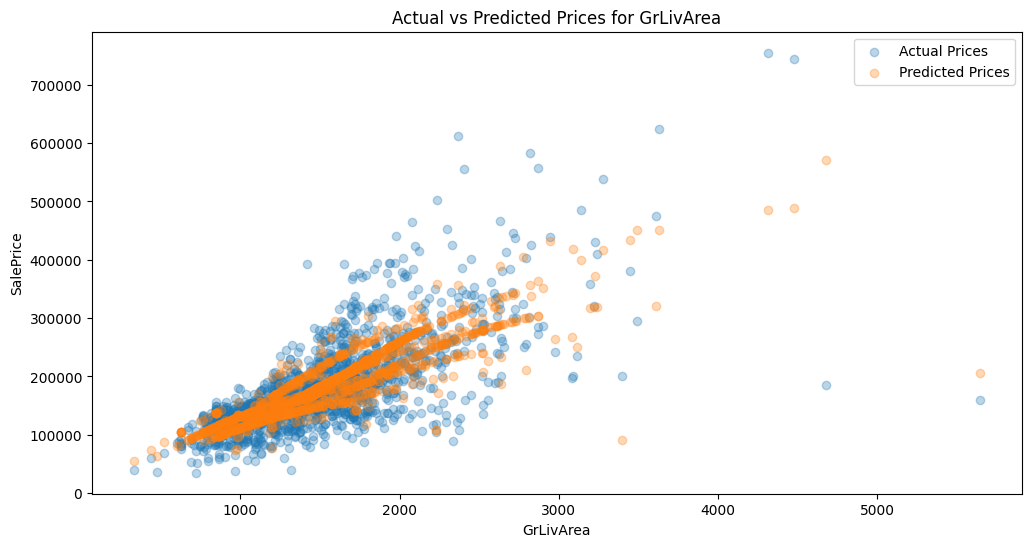

LinearRegression()

In [10]:
# Create a scatter plot for actual vs predicted prices for GrLivArea feature
plt.figure(figsize=(12, 6))
plt.scatter(X_combined['GrLivArea'], y_combined, alpha=0.3, label='Actual Prices')
plt.scatter(X_combined['GrLivArea'], y_combined_pred, alpha=0.3, label='Predicted Prices')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Actual vs Predicted Prices for GrLivArea')
plt.legend()
plt.show()

# Fit a simple linear regression model for the GrLivArea feature
simple_model = LinearRegression()
simple_model.fit(X_combined[['GrLivArea']], y_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


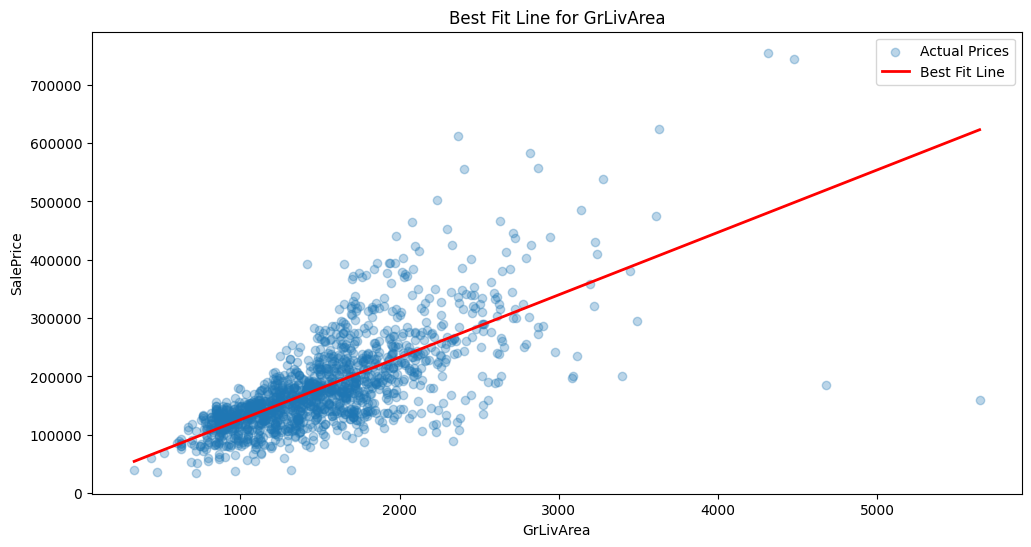

In [11]:
# Create predictions for the best fit line
x_range = np.linspace(X_combined['GrLivArea'].min(), X_combined['GrLivArea'].max(), 100).reshape(-1, 1)
y_range_pred = simple_model.predict(x_range)

# Plot the best fit line
plt.figure(figsize=(12, 6))
plt.scatter(X_combined['GrLivArea'], y_combined, alpha=0.3, label='Actual Prices')
plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Best Fit Line for GrLivArea')
plt.legend()
plt.show()

In [13]:
# Display the first few test predictions
print(test_predictions[:10])


[119760.05600918 155796.49137248 199741.0897965  195225.71088462
 179226.54590649 204378.31352935 133335.59257354 169109.85076483
 184777.69855724 118094.62883759]


In [12]:
# Create a dataframe with the predictions for the entire data
combined_data = pd.concat([X_combined, X_test])
combined_data['PredictedSalePrice'] = np.concatenate([y_combined_pred, test_predictions])

# Display the first few rows of the dataframe with predictions
print(combined_data.head())

# Save the dataframe with predictions to a CSV file
combined_data.to_csv('combined_predictions.csv', index=False)


      GrLivArea  BedroomAbvGr  TotalBath  PredictedSalePrice
254        1314             3        1.0       137759.875979
1066       1571             3        2.5       189180.579332
638         796             2        1.0       107482.982569
799        1768             3        1.5       196613.338818
380        1691             3        2.0       208691.803339
